# Project: Microcalcification Classification

In [1]:
PATH = "data/mammography.csv"

In [2]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
# define the dataset location
filename = PATH
# load the csv file as a data frame 
dataframe = read_csv(filename, header=None) 
# summarize the shape of the dataset 
print(dataframe.shape)
# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
  per = v / len(target) * 100
  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

(11183, 7)
Class='-1', Count=10923, Percentage=97.675%
Class='1', Count=260, Percentage=2.325%


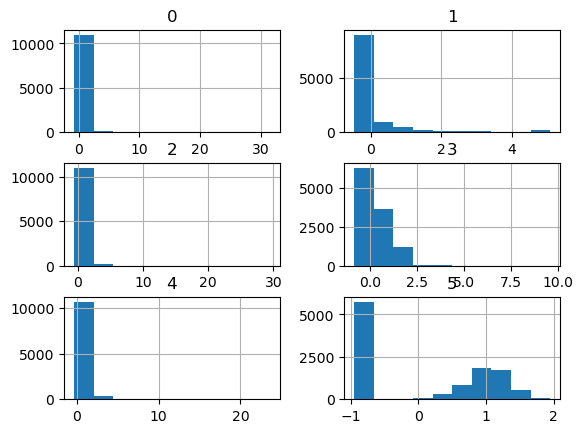

In [3]:
# create histograms of numeric input variables
from pandas import read_csv
from matplotlib import pyplot
# define the dataset location 
filename = PATH
# load the csv file as a data frame 
df = read_csv(filename, header=None) 
# histograms of all variables 
df.hist()
pyplot.show()